# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

In [21]:
# import sys
# reload(sys)
# sys.setdefaultencoding("utf-8")
import warnings
warnings.filterwarnings("ignore")

In [22]:
import random

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_moons, make_classification

# Task 1. Create dataset for binary classification task (binary crossentropy), where k-NN perfoms **worse** than logistic regression

Whille using linear regression, the best result could be achieved on linearly separable sample. k-NN assigns class labels based on the class labels of the closest objects in the training set, that is why we need to create a linearly separable sample, where the objects of different classes will be often close to each other. The example of such sample is the sample where the distances between two classes are less than the disctances between the objects of the same class.

In [23]:
X, y = make_classification(n_samples=100, n_informative=2, n_redundant=0, n_features=2, n_classes=2, random_state=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

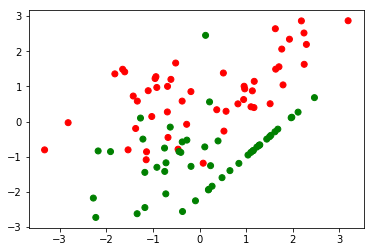

In [24]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=["r" if i == 1 else "g" for i in y])
plt.show()

In [25]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
print("Test dataset score: ", lr_clf.score(X_train, y_train))

gs = GridSearchCV(lr_clf, param_grid={'C': np.arange(0.01, 1, 0.01)}, cv=5)
gs.fit(X_train, y_train)
best_score = gs.best_estimator_.score(X_test, y_test)

print("Hyperparam C: ", gs.best_params_)
print("Accuracy on testing subsample: ", best_score)

('Test dataset score: ', 0.9066666666666666)
('Hyperparam C: ', {'C': 0.13})
('Accuracy on testing subsample: ', 0.8)


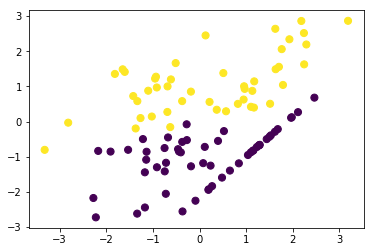

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=lr_clf.predict(X), s=50, cmap='viridis');

In [27]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print("Test dataset score: ", knn_clf.score(X_train, y_train))

gs = GridSearchCV(knn_clf, param_grid={'n_neighbors': range(1, 10)}, cv=5)
gs.fit(X_train, y_train)
best_score = gs.best_estimator_.score(X_test, y_test)

print("Hyperparam C: ", gs.best_params_)
print("Accuracy on testing sample: ", best_score)

('Test dataset score: ', 0.88)
('Hyperparam C: ', {'n_neighbors': 8})
('Accuracy on testing sample: ', 0.76)


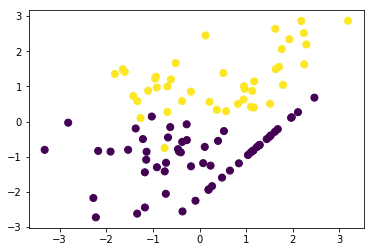

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=knn_clf.predict(X), s=50, cmap='viridis');

# Task 2. Create dataset for binary classification task (binary crossentropy), where logistic regression perfoms **worse** than k-NN

Logistic regression copes well with linearly separable samples, and the k-NN with samples in which objects of the same class lie close to each other. So, we need to generate a linearly inseparable sample, on which, however, stable clusters of objects of the same class will be observed. To do this, we divide the coordinate plane into four squares and assign class 1 to the points in the lower left and upper right squares, and to the points in the lower right and upper left squares - class 0. Since the points of class 1 cannot be separated from the points of class 1 by only one straight line, our sample will be linearly inseparable.

In [29]:
X, y = make_moons(100, noise=.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

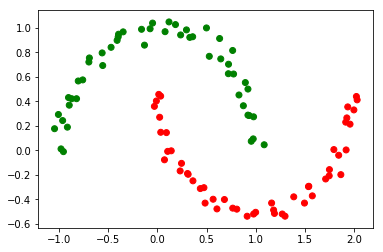

In [30]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=["r" if i == 1 else "g" for i in y])
plt.show()

In [31]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
print("Test dataset score: ", lr_clf.score(X_train, y_train))

gs = GridSearchCV(lr_clf, param_grid={'C': np.arange(0.01, 1, 0.01)}, cv=5)
gs.fit(X_train, y_train)
best_score = gs.best_estimator_.score(X_test, y_test)

print("Hyperparam C: ", gs.best_params_)
print("Accuracy on testing sample: ", best_score)

('Test dataset score: ', 0.88)
('Hyperparam C: ', {'C': 0.39})
('Accuracy on testing sample: ', 0.8)


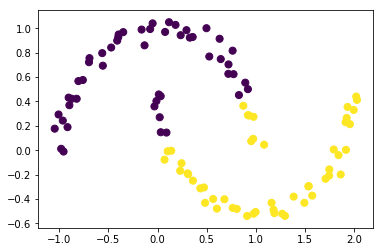

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=lr_clf.predict(X), s=50, cmap='viridis');

In [33]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print("Test dataset score: ", knn_clf.score(X_train, y_train))

gs = GridSearchCV(knn_clf, param_grid={'n_neighbors': range(1, 10)}, cv=5)
gs.fit(X_train, y_train)
best_score = gs.best_estimator_.score(X_test, y_test)

print("Hyperparam n_neighbors: ", gs.best_params_)
print("Accuracy on testing subsample: ", best_score)

('Test dataset score: ', 1.0)
('Hyperparam n_neighbors: ', {'n_neighbors': 1})
('Accuracy on testing subsample: ', 1.0)


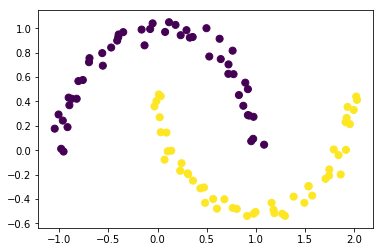

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=knn_clf.predict(X), s=50, cmap='viridis');

# Task 3. Create dataset for binary classification task (binary crossentropy), where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance

For the Euclidean distance, the specific values of the measurement vectors are important, and for the cosine distance, only the direction of the vectors (So, between the vectors [1,2] and [2,4], the cosine distance will be zero. Accordingly, in the sample on which KNN with cosine distance it will cope well, and KNN with Euclidean distance is bad, points of two classes should lie close enough to each other, but on differently directed vectors.We will construct two two-dimensional vectors and concentrate the greatest density of points closer to the point of their intersection:

In [35]:
normal_rand = np.random.normal(0, 1, size=(100, ))

X_1 = [(1 * k , 3 * k) for k in normal_rand]
X_2 = [(0.9 * k , 3.1 * k ) for k in normal_rand]
X = np.array(X_1 + X_2)

y_1 = [1 for i in range(100)]
y_2 = [0 for i in range(100)]
y = np.array(y_1 + y_2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

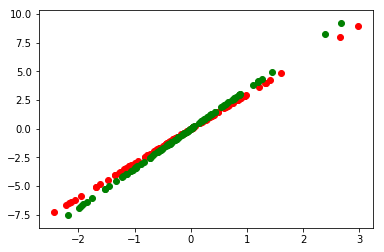

In [36]:
plt.figure()

plt.scatter([i[0] for i in X_1], [i[1] for i in X_1], color="r")
plt.scatter([i[0] for i in X_2], [i[1] for i in X_2], color="g")

plt.show()

In [37]:
knn_clf = KNeighborsClassifier(metric="euclidean")
knn_clf.fit(X_train, y_train)
print("Test dataset score: ", knn_clf.score(X_train, y_train))

gs = GridSearchCV(knn_clf, param_grid={'n_neighbors': range(1, 10)}, cv=5)
gs.fit(X_train, y_train)
best_score = gs.best_estimator_.score(X_test, y_test)

print("Hyperparam n_neighbors: ", gs.best_params_)
print("Accuracy on testing sample: ", best_score)

('Test dataset score: ', 0.7533333333333333)
('Hyperparam n_neighbors: ', {'n_neighbors': 1})
('Accuracy on testing sample: ', 0.42)


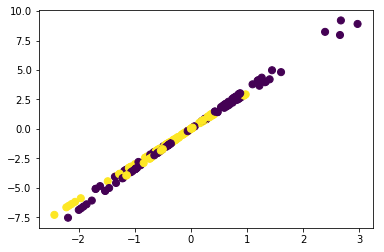

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=knn_clf.predict(X), s=50)

In [39]:
knn_clf = KNeighborsClassifier(metric="cosine")
knn_clf.fit(X_train, y_train)
print("Test dataset score: ", knn_clf.score(X_train, y_train))

gs = GridSearchCV(knn_clf, param_grid={'n_neighbors': range(1, 10)}, cv=5)
gs.fit(X_train, y_train)
best_score = gs.best_estimator_.score(X_test, y_test)

print("Hyperparam n_neighbors: ", gs.best_params_)
print("Accuracy on testing subsample: ", best_score)

('Test dataset score: ', 1.0)
('Hyperparam n_neighbors: ', {'n_neighbors': 1})
('Accuracy on testing subsample: ', 1.0)


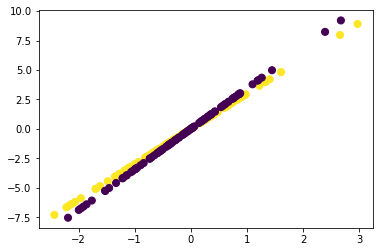

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=knn_clf.predict(X), s=50);